## Jaccard index computation between shape files for all Bangalore ROIs
### Developement version

This notebook illustrates the calculation of the Jaccard index between ground truth and result shape files. The example is using 5 ROIs from a 2017 GoogleEarth image of Bangalore, India. 

Python and Satsense imports:

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

# satesense import
from satsense.util.shapefile import load_shapefile2multipolygon as sh2mul # loading shapefile to shapely multi-polygon
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons
from satsense.performance.jaccard_similarity import jaccard_index_multipolygons as jim # jaccard index computation

Parameters and paths.

In [2]:
# parameters
TRUTH_MASKS_PATH = '/home/elena/DynaSlum/Data/Bangalore/GEImages/masks/'
RESULTS_MASKS_PATH = '/home/elena/DynaSlum/Results/Bangalore/Segmentation/'

ext_shape = 'shp'

# visualization params
RED = '#FF0000'
MAROON = '#800000'
GREEN = '#00FF00'
OLIVE = '#808000'
BLUE = '#0000FF'
NAVY = '#000080'
offset = 100
alpha = 0.8
alpha_over = 0.6
show_verticies = False

ROIs = ['ROI1', 'ROI2','ROI3', 'ROI4', 'ROI5']
#ROIs = ['ROI1']

### Computations of the Jaccard index

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading  ROI1
---------------------------------------------------------------------------------------
Visualizing  ROI1


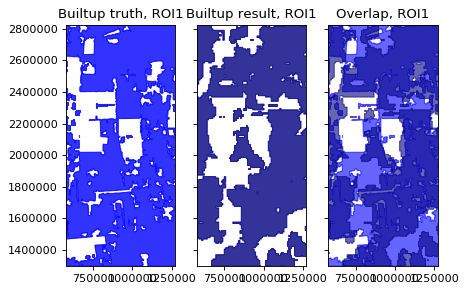

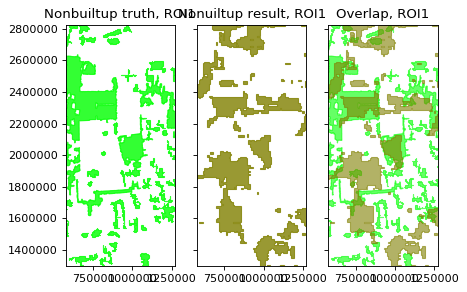

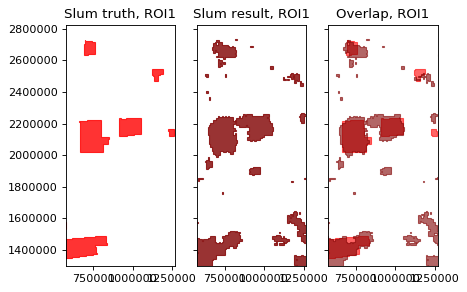

---------------------------------------------------------------------------------------
Jaccard Index computations  ROI1
The Jaccard Index between multipolygons 'truth' and 'result for builtup class':  0.6191001586235804
The Jaccard Index between multipolygons 'truth' and 'result for nonbuiltup class':  0.22498746914408324
The Jaccard Index between multipolygons 'truth' and 'result for slum class':  0.31525441031657686
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading  ROI2
---------------------------------------------------------------------------------------
Visualizing  ROI2


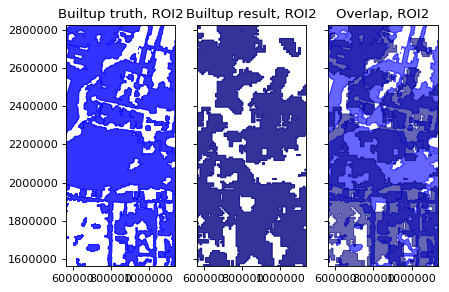

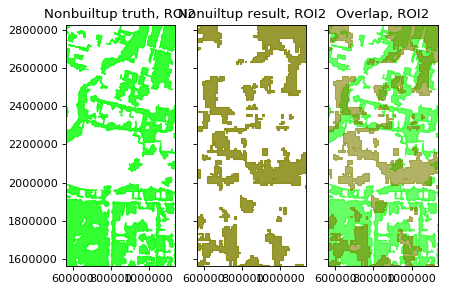

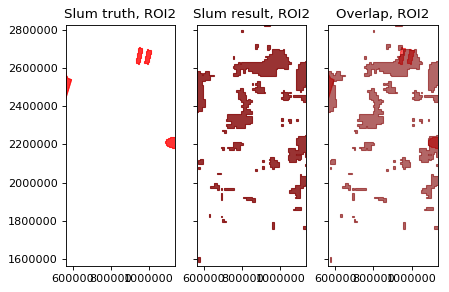

---------------------------------------------------------------------------------------
Jaccard Index computations  ROI2
The Jaccard Index between multipolygons 'truth' and 'result for builtup class':  0.49369599294652583
The Jaccard Index between multipolygons 'truth' and 'result for nonbuiltup class':  0.21430051978859427
The Jaccard Index between multipolygons 'truth' and 'result for slum class':  0.29379727124192245
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading  ROI3
---------------------------------------------------------------------------------------
Visualizing  ROI3


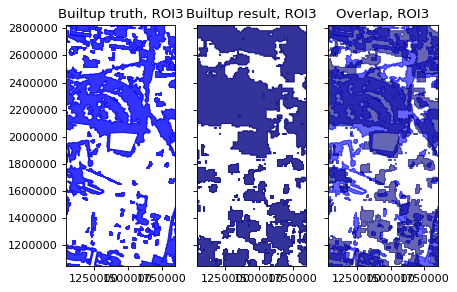

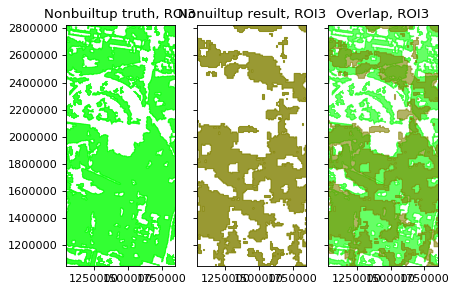

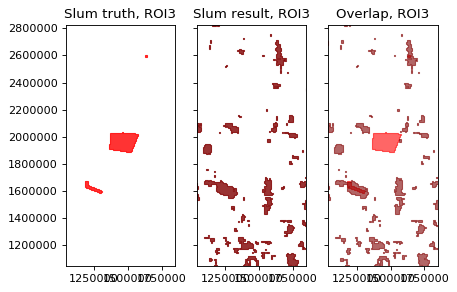

---------------------------------------------------------------------------------------
Jaccard Index computations  ROI3
The Jaccard Index between multipolygons 'truth' and 'result for builtup class':  0.4759664277919759
The Jaccard Index between multipolygons 'truth' and 'result for nonbuiltup class':  0.34356296671251063
The Jaccard Index between multipolygons 'truth' and 'result for slum class':  0.05012028942712014
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading  ROI4
---------------------------------------------------------------------------------------
Visualizing  ROI4


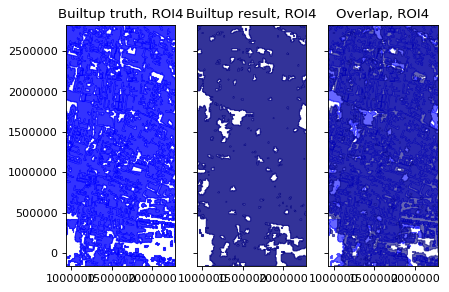

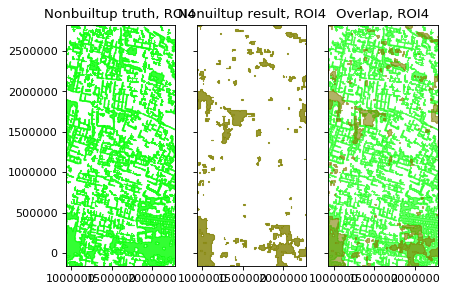

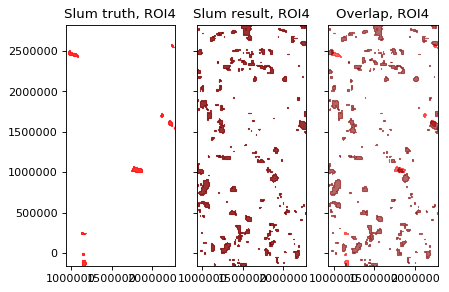

---------------------------------------------------------------------------------------
Jaccard Index computations  ROI4
The Jaccard Index between multipolygons 'truth' and 'result for builtup class':  0.6241920112809477
The Jaccard Index between multipolygons 'truth' and 'result for nonbuiltup class':  0.3878879786689164
The Jaccard Index between multipolygons 'truth' and 'result for slum class':  0.09346599378758691
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading  ROI5
---------------------------------------------------------------------------------------
Visualizing  ROI5


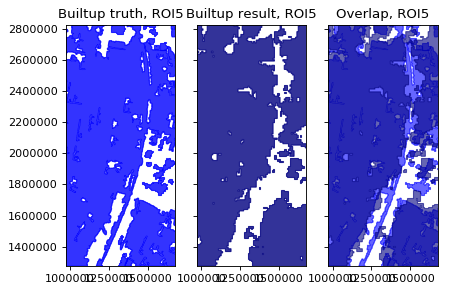

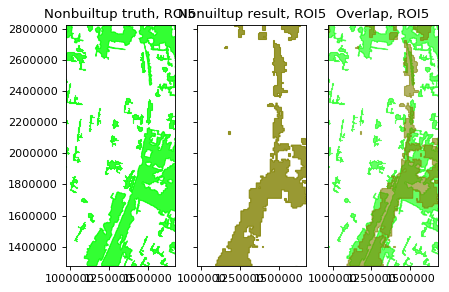

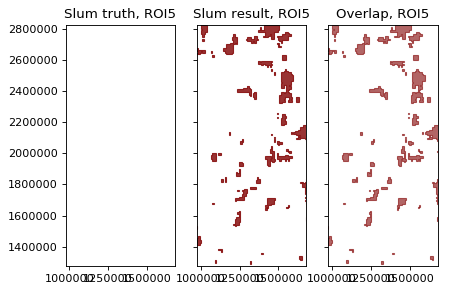

---------------------------------------------------------------------------------------
Jaccard Index computations  ROI5
The Jaccard Index between multipolygons 'truth' and 'result for builtup class':  0.6851727837924386
The Jaccard Index between multipolygons 'truth' and 'result for nonbuiltup class':  0.36406886847153647
The Jaccard Index between multipolygons 'truth' and 'result for slum class':  0.16754737203962833


In [3]:
# Loading, visualizations and calculations
for roi in ROIs:
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Loading ", roi)
    
    # Filenames
    truth_builtup_shape_fname = 'Bangalore_' + roi + '_builtupMask' + '.' + ext_shape
    truth_nonbuiltup_shape_fname = 'Bangalore_' + roi + '_nonbuiltupMask' + '.' + ext_shape
    truth_slum_shape_fname = 'Bangalore_' + roi + '_slumMask' + '.' + ext_shape

    truth_builtup_shape_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_builtup_shape_fname)
    truth_nonbuiltup_shape_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_nonbuiltup_shape_fname)
    truth_slum_shape_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_slum_shape_fname)

    result_builtup_shape_fname = 'Bangalore_' + roi + '_builtupResult' + '.' + ext_shape
    result_nonbuiltup_shape_fname = 'Bangalore_' + roi + '_nonbuiltupResult' + '.' + ext_shape
    result_slum_shape_fname = 'Bangalore_' + roi + '_slumResult' + '.' + ext_shape

    result_builtup_shape_fullfname = os.path.join(RESULTS_MASKS_PATH, result_builtup_shape_fname)
    result_nonbuiltup_shape_fullfname = os.path.join(RESULTS_MASKS_PATH, result_nonbuiltup_shape_fname)
    result_slum_shape_fullfname = os.path.join(RESULTS_MASKS_PATH, result_slum_shape_fname)

    # loading multipolygons from the shape files
    truth_builtup_multi, tb_bounds = sh2mul(truth_builtup_shape_fullfname)
    truth_nonbuiltup_multi, tnb_bounds = sh2mul(truth_nonbuiltup_shape_fullfname)
    truth_slum_multi, ts_bounds = sh2mul(truth_slum_shape_fullfname)


    result_builtup_multi, rb_bounds = sh2mul(result_builtup_shape_fullfname)
    result_nonbuiltup_multi, rnb_bounds = sh2mul(result_nonbuiltup_shape_fullfname)
    result_slum_multi, rs_bounds = sh2mul(result_slum_shape_fullfname)
    
    #visualization
    print("---------------------------------------------------------------------------------------")
    print("Visualizing ", roi)
    
    # Display truth and modified1
    _, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, dpi=80)
    txmin, tymin, txmax, tymax = tb_bounds
    rxmin, rymin, rxmax, rymax = rb_bounds
    xmin = min(txmin, rxmin)
    ymin = min(tymin, rymin)
    xmax = max(txmax, rxmax)
    ymax = max(tymax, rymax)
    extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
    ax1 = shmp(truth_builtup_multi, ax1, show_verticies, extent, BLUE, alpha,'Builtup truth, '+roi)
    ax2 = shmp(result_builtup_multi, ax2, show_verticies, extent, NAVY, alpha,'Builtup result, '+roi)
    ax3 = shmp(truth_builtup_multi, ax3, show_verticies, extent, BLUE, alpha_over,'')
    ax3 = shmp(result_builtup_multi, ax3, show_verticies, extent, NAVY, alpha_over, 'Overlap, '+roi)

    plt.show();
    
    _, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, dpi=80)
    txmin, tymin, txmax, tymax = tnb_bounds
    rxmin, rymin, rxmax, rymax = rnb_bounds
    xmin = min(txmin, rxmin)
    ymin = min(tymin, rymin)
    xmax = max(txmax, rxmax)
    ymax = max(tymax, rymax)
    extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
    ax1 = shmp(truth_nonbuiltup_multi, ax1, show_verticies, extent, GREEN, alpha,'Nonbuiltup truth, '+roi)
    ax2 = shmp(result_nonbuiltup_multi, ax2, show_verticies, extent, OLIVE, alpha,'Nonuiltup result, '+roi)
    ax3 = shmp(truth_nonbuiltup_multi, ax3, show_verticies, extent, GREEN, alpha_over,'')
    ax3 = shmp(result_nonbuiltup_multi, ax3, show_verticies, extent, OLIVE, alpha_over, 'Overlap, '+roi)

    plt.show();    
    
    _, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, dpi=80)
    txmin, tymin, txmax, tymax = ts_bounds
    rxmin, rymin, rxmax, rymax = rs_bounds
    xmin = min(txmin, rxmin)
    ymin = min(tymin, rymin)
    xmax = max(txmax, rxmax)
    ymax = max(tymax, rymax)
    extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
    ax1 = shmp(truth_slum_multi, ax1, show_verticies, extent, RED, alpha,'Slum truth, '+roi)
    ax2 = shmp(result_slum_multi, ax2, show_verticies, extent, MAROON, alpha,'Slum result, '+roi)
    ax3 = shmp(truth_slum_multi, ax3, show_verticies, extent, RED, alpha_over,'')
    ax3 = shmp(result_slum_multi, ax3, show_verticies, extent, MAROON, alpha_over, 'Overlap, '+roi)

    plt.show();
    
    #compuations
    print("---------------------------------------------------------------------------------------")
    print("Jaccard Index computations ", roi)
    
    jss_builtup = jim(truth_builtup_multi, result_builtup_multi)
    print("The Jaccard Index between multipolygons 'truth' and 'result for builtup class': ",jss_builtup)
    jss_nonbuiltup = jim(truth_nonbuiltup_multi, result_nonbuiltup_multi)
    print("The Jaccard Index between multipolygons 'truth' and 'result for nonbuiltup class': ",jss_nonbuiltup)
    jss_slum = jim(truth_slum_multi, result_slum_multi)
    print("The Jaccard Index between multipolygons 'truth' and 'result for slum class': ",jss_slum)